In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train1 = pd.read_csv("/content/training1.csv")
train2 = pd.read_csv("/content/training2.csv")
conf_matrix = pd.read_csv("/content/confusion_matrix.csv")

In [ ]:
print("=== Training 1 ===")
print(train1.info())
print(train1.head())

print("\n=== Training 2 ===")
print(train2.info())
print(train2.head())

print("\n=== Confusion Matrix ===")
print(conf_matrix.info())
print(conf_matrix.head())


=== Training 1 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   epoch                 130 non-null    int64  
 1   time                  130 non-null    float64
 2   train/box_loss        130 non-null    float64
 3   train/cls_loss        130 non-null    float64
 4   train/dfl_loss        130 non-null    float64
 5   metrics/precision(B)  130 non-null    float64
 6   metrics/recall(B)     130 non-null    float64
 7   metrics/mAP50(B)      130 non-null    float64
 8   metrics/mAP50-95(B)   130 non-null    float64
 9   val/box_loss          130 non-null    float64
 10  val/cls_loss          130 non-null    float64
 11  val/dfl_loss          130 non-null    float64
 12  lr/pg0                130 non-null    float64
 13  lr/pg1                130 non-null    float64
 14  lr/pg2                130 non-null    float64
dtypes: f

In [ ]:
print("\nTraining 1 columns:")
print(train1.columns.tolist())

print("\nTraining 2 columns:")
print(train2.columns.tolist())



Training 1 columns:
['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']

Training 2 columns:
['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


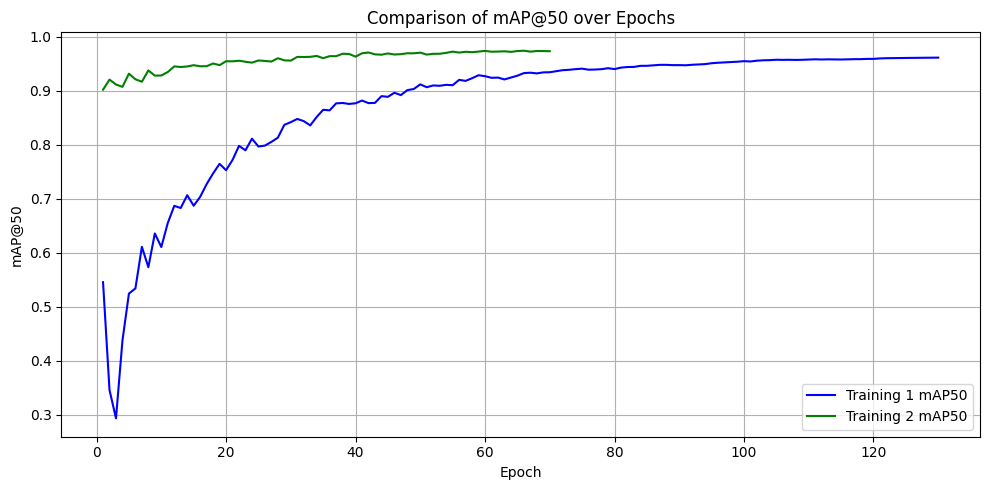

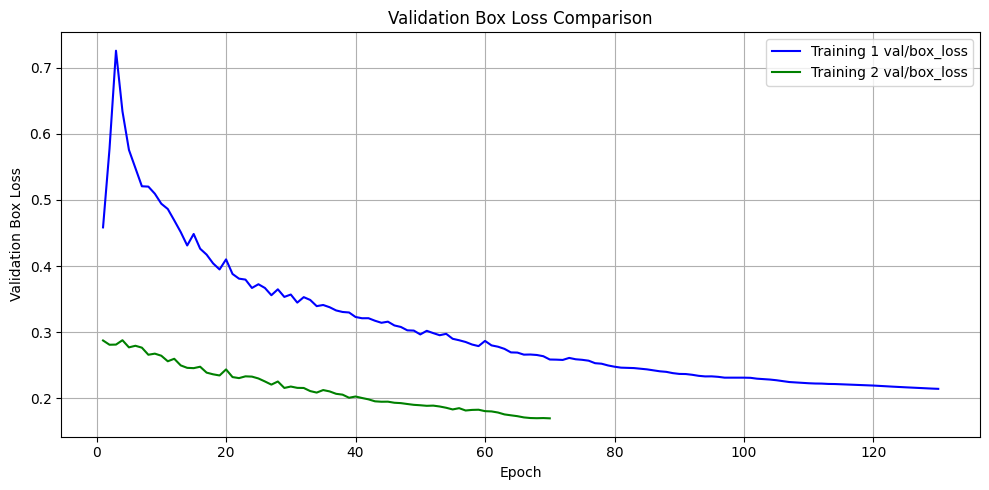

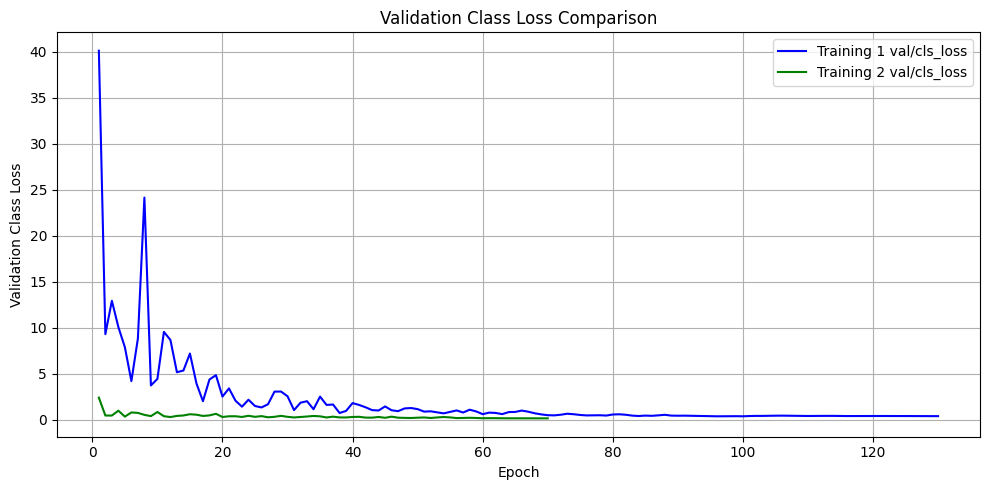

In [ ]:
import matplotlib.pyplot as plt

# Plot metrics/mAP50(B)
plt.figure(figsize=(10, 5))
plt.plot(train1['epoch'], train1['metrics/mAP50(B)'], label='Training 1 mAP50', color='blue')
plt.plot(train2['epoch'], train2['metrics/mAP50(B)'], label='Training 2 mAP50', color='green')
plt.xlabel('Epoch')
plt.ylabel('mAP@50')
plt.title('Comparison of mAP@50 over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot val/box_loss
plt.figure(figsize=(10, 5))
plt.plot(train1['epoch'], train1['val/box_loss'], label='Training 1 val/box_loss', color='blue')
plt.plot(train2['epoch'], train2['val/box_loss'], label='Training 2 val/box_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Validation Box Loss')
plt.title('Validation Box Loss Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot val/cls_loss
plt.figure(figsize=(10, 5))
plt.plot(train1['epoch'], train1['val/cls_loss'], label='Training 1 val/cls_loss', color='blue')
plt.plot(train2['epoch'], train2['val/cls_loss'], label='Training 2 val/cls_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Validation Class Loss')
plt.title('Validation Class Loss Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


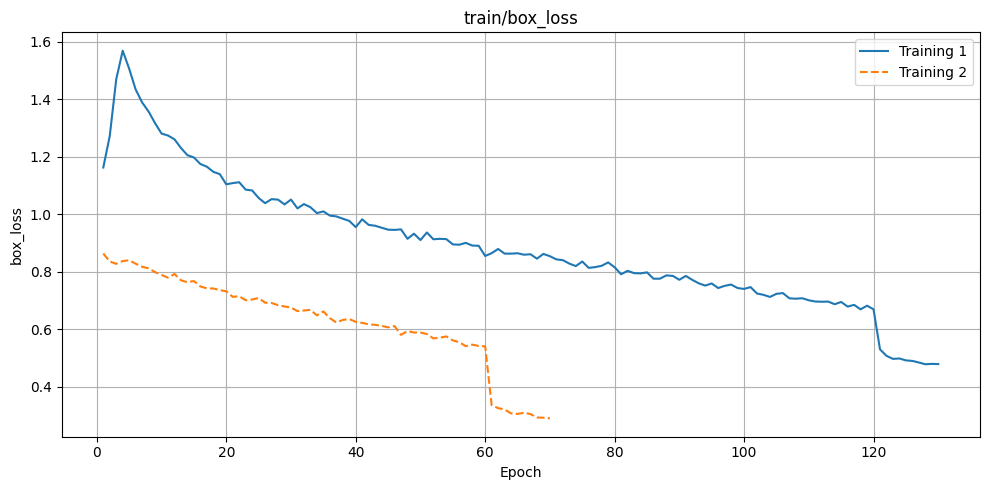

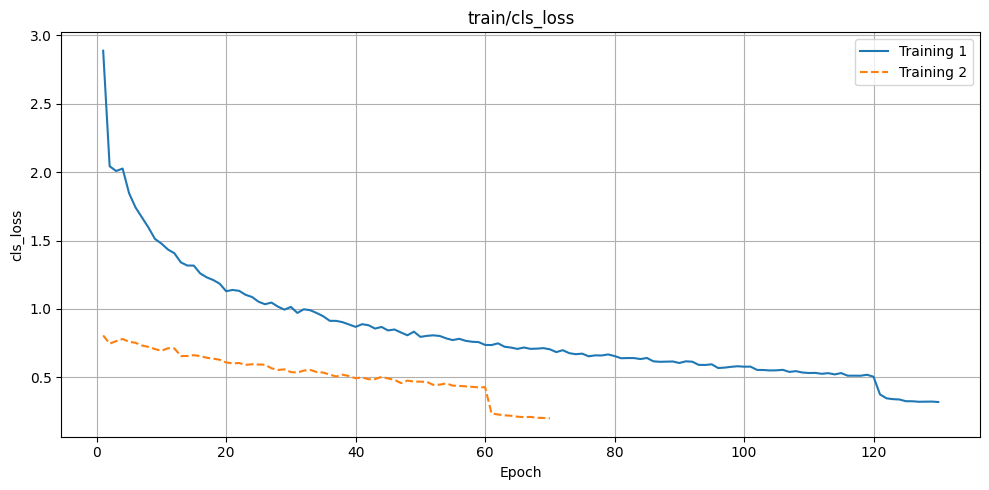

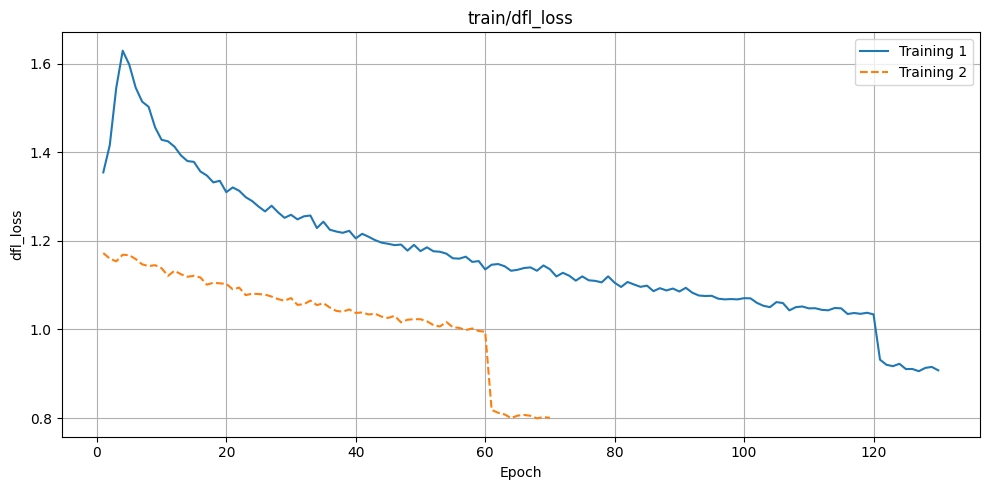

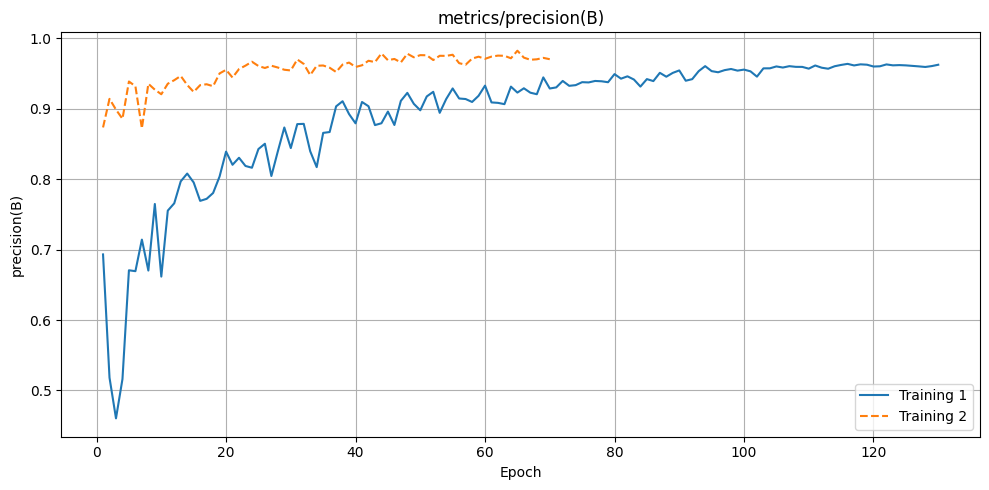

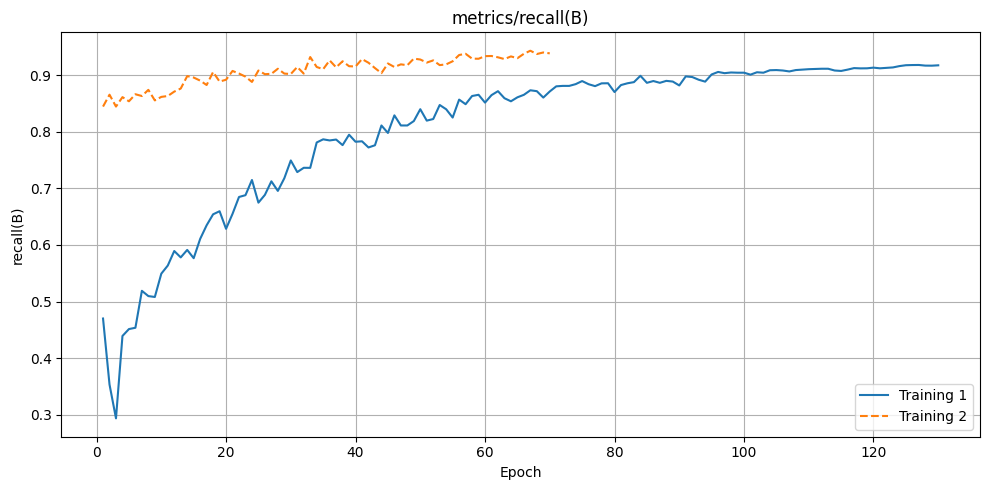

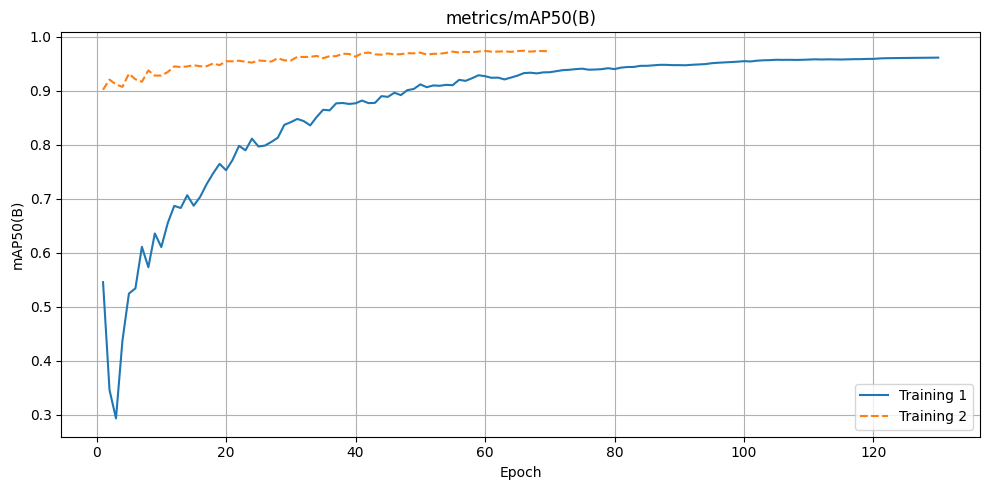

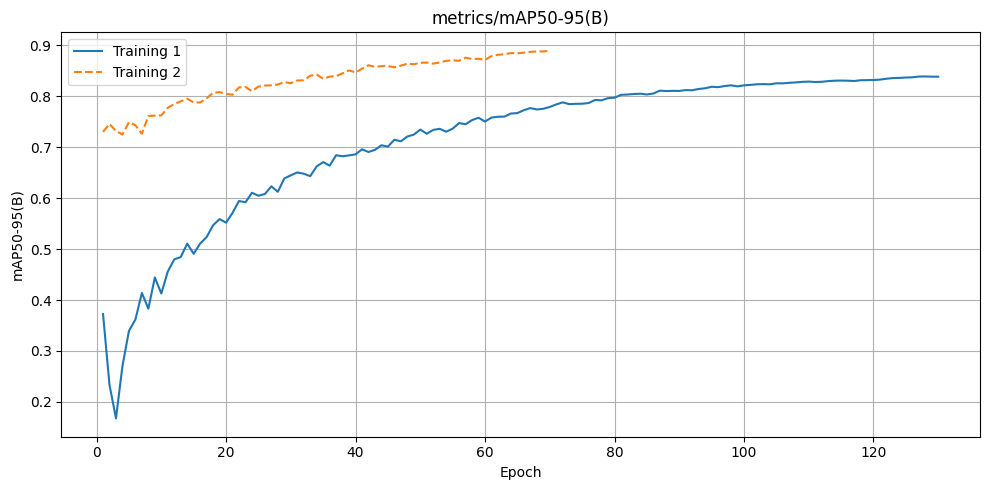

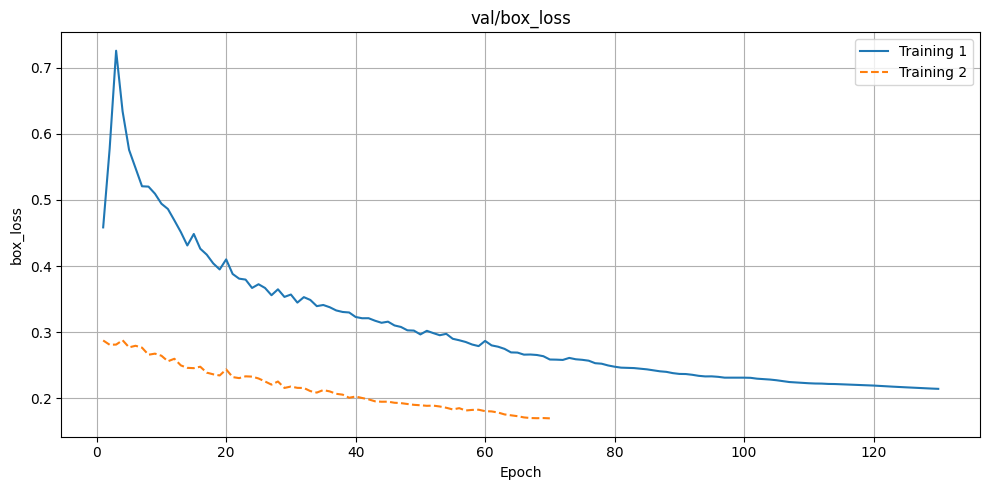

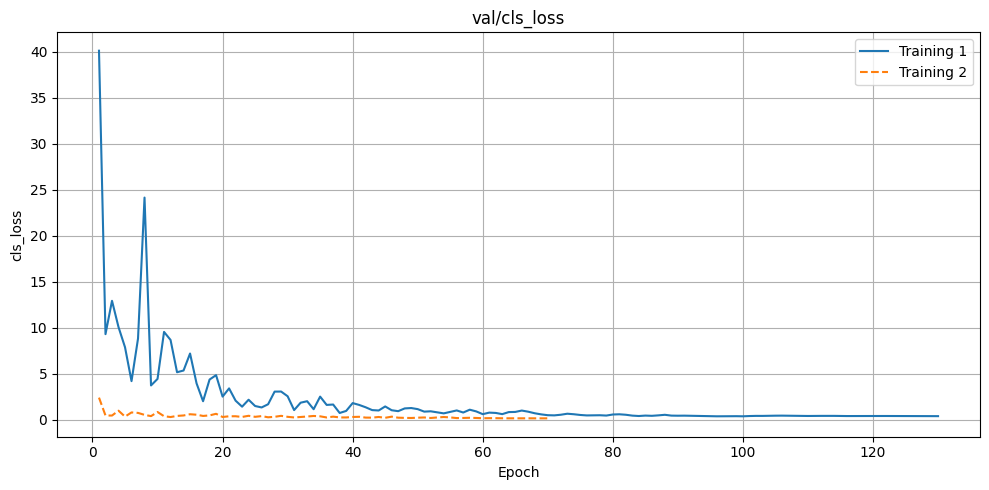

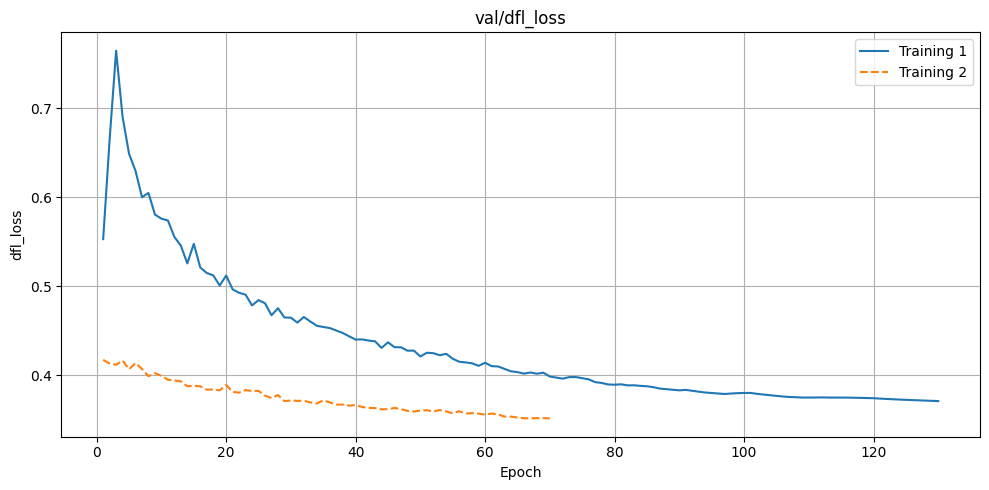

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs
train1 = pd.read_csv("/content/training1.csv")
train2 = pd.read_csv("/content/training2.csv")

# Columns to plot (exclude 'epoch' and time-related fields)
plot_columns = [
    'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
    'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)',
    'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
]

# Plot each column individually
for col in plot_columns:
    plt.figure(figsize=(10, 5))
    plt.plot(train1['epoch'], train1[col], label='Training 1')
    plt.plot(train2['epoch'], train2[col], label='Training 2', linestyle='--')
    plt.title(col)
    plt.xlabel("Epoch")
    plt.ylabel(col.split('/')[-1])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


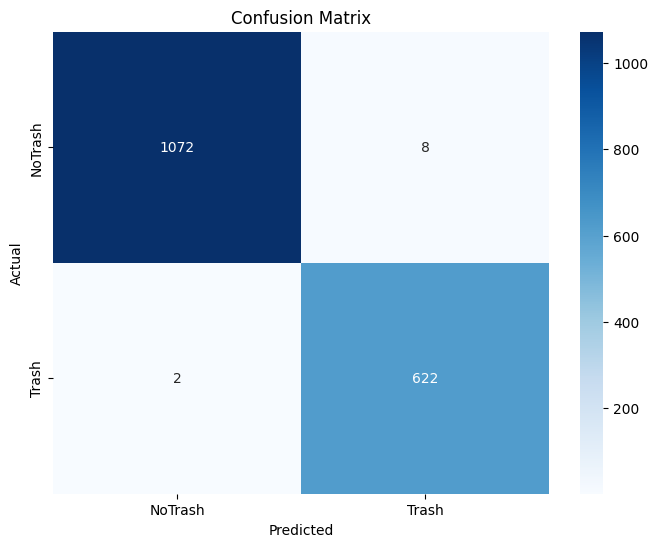

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load data
conf_df = pd.read_csv("/content/confusion_matrix.csv")

# Extract labels
y_true = conf_df['actual']
y_pred = conf_df['predicted']
labels = sorted(list(set(y_true) | set(y_pred)))  # All unique classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [23]:
import pandas as pd

# Load the CSVs
df1 = pd.read_csv("/content/training1.csv")
df2 = pd.read_csv("/content/training2.csv")

# Select only desired columns (no val loss)
metrics1 = df1[[
    'epoch',
    'metrics/precision(B)',
    'metrics/recall(B)',
    'metrics/mAP50(B)',
    'metrics/mAP50-95(B)',
    'train/box_loss',
    'train/cls_loss'
]].rename(columns={
    'metrics/precision(B)': 'Precision_1',
    'metrics/recall(B)': 'Recall_1',
    'metrics/mAP50(B)': 'mAP50_1',
    'metrics/mAP50-95(B)': 'mAP50-95_1',
    'train/box_loss': 'BoxLoss_1',
    'train/cls_loss': 'ClsLoss_1'
})

metrics2 = df2[[
    'epoch',
    'metrics/precision(B)',
    'metrics/recall(B)',
    'metrics/mAP50(B)',
    'metrics/mAP50-95(B)',
    'train/box_loss',
    'train/cls_loss'
]].rename(columns={
    'metrics/precision(B)': 'Precision_2',
    'metrics/recall(B)': 'Recall_2',
    'metrics/mAP50(B)': 'mAP50_2',
    'metrics/mAP50-95(B)': 'mAP50-95_2',
    'train/box_loss': 'BoxLoss_2',
    'train/cls_loss': 'ClsLoss_2'
})

# Merge on epoch
comparison_table = pd.merge(metrics1, metrics2, on='epoch', how='outer')

# Round for readability
comparison_table = comparison_table.round(4)

# Display the comparison
print(comparison_table.to_string(index=False))


 epoch  Precision_1  Recall_1  mAP50_1  mAP50-95_1  BoxLoss_1  ClsLoss_1  Precision_2  Recall_2  mAP50_2  mAP50-95_2  BoxLoss_2  ClsLoss_2
     1       0.6932    0.4701   0.5452      0.3724     1.1622     2.8886       0.8735    0.8446   0.9015      0.7301     0.8633     0.8061
     2       0.5181    0.3535   0.3454      0.2333     1.2722     2.0436       0.9141    0.8656   0.9202      0.7455     0.8357     0.7463
     3       0.4604    0.2937   0.2930      0.1679     1.4690     2.0088       0.8988    0.8446   0.9112      0.7316     0.8275     0.7642
     4       0.5161    0.4392   0.4372      0.2707     1.5683     2.0267       0.8857    0.8613   0.9068      0.7247     0.8372     0.7802
     5       0.6706    0.4514   0.5241      0.3393     1.5056     1.8466       0.9387    0.8539   0.9312      0.7488     0.8398     0.7597
     6       0.6694    0.4538   0.5336      0.3618     1.4336     1.7420       0.9321    0.8664   0.9208      0.7429     0.8280     0.7526
     7       0.7142    0.51